In [7]:
import os
import keras
import numpy as np
from tqdm import tqdm 
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi
from keras.preprocessing.image import load_img, img_to_array 
import matplotlib.pyplot as plt

# Load Data

data ---
https://www.kaggle.com/code/utkarshsaxenadn/pix2pixgan-map-generator/notebook

In [60]:
def load_data(path, trim=None):
  paths = sorted(glob(path + "*.jpg"))
    
  if trim is not None:
    paths = sorted(glob(path + "*.jpg"))[:trim]
      
  images = np.zeros(shape=(len(paths), 256, 256, 3))
  masks = np.zeros(shape=(len(paths), 256, 256, 3))
    
  for i,path in tqdm(enumerate(paths), desc="Data"):
      image = tf.cast(img_to_array(load_img(path)), tf.float32)
      img = image[:,:600,:]
      mask = image[:,600:,:]
      images[i] = tfi.resize(img,(256,256))/255.
      masks[i] = tfi.resize(mask,(256,256))/255.
  return images, masks

def show_image(image, title=None, alpha=1.0):
  plt.imshow(image, alpha=alpha)
  if title is not None:
    plt.title(title)
  plt.axis("off")

def show_mask(image, mask, alpha=0.4, title=None):
  image = tf.squeeze(tf.cast(image, tf.float32))
  mask = tf.squeeze(tf.cast(mask, tf.float32))
  show_image(image)
  show_image(mask, alpha=alpha, title=title)

In [61]:
# trim dataset to avoid ram issues
dataset = load_data('Data\\maps\\train\\', trim=1000)
images, masks = dataset

Data: 1000it [00:18, 53.92it/s]


In [62]:
data = tf.data.Dataset.from_tensor_slices(dataset).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

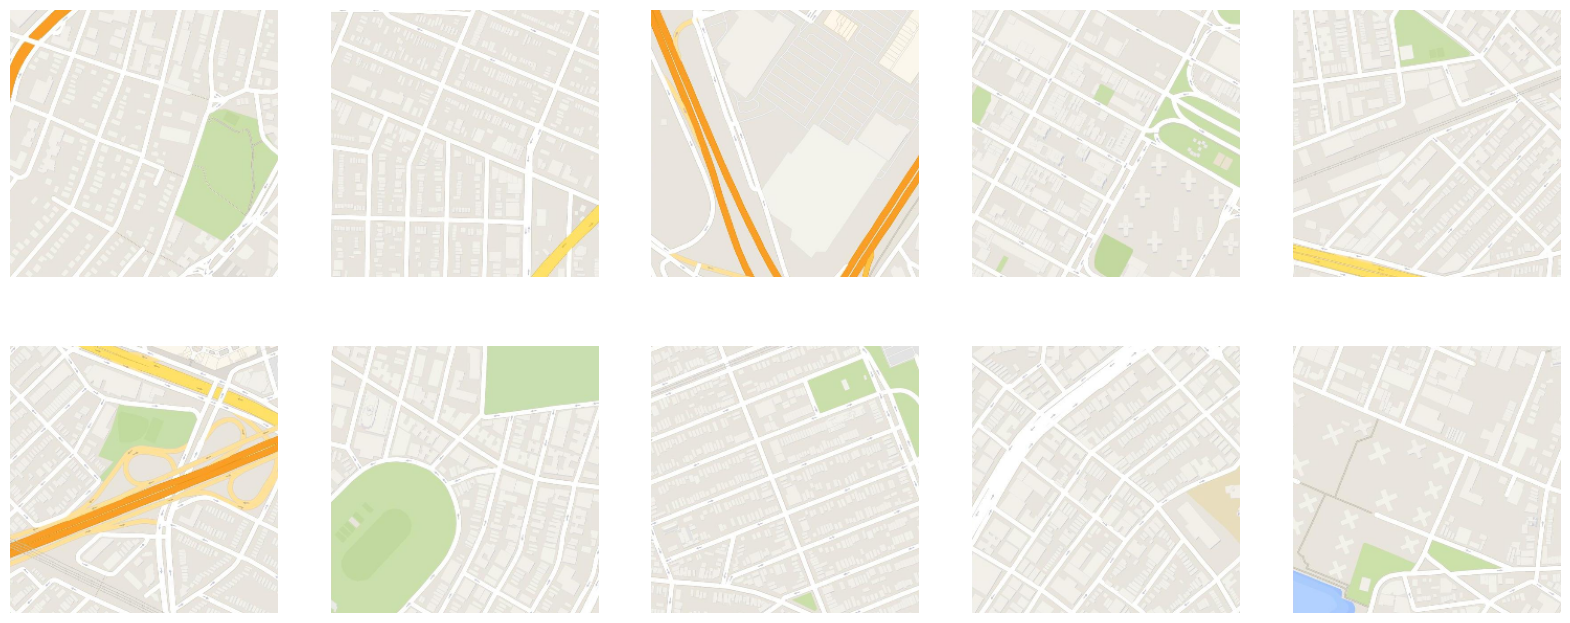

In [92]:
for images, masks in data.take(1):
    sample_images = images
    sample_masks = masks
    break

plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_image(sample_masks[i])

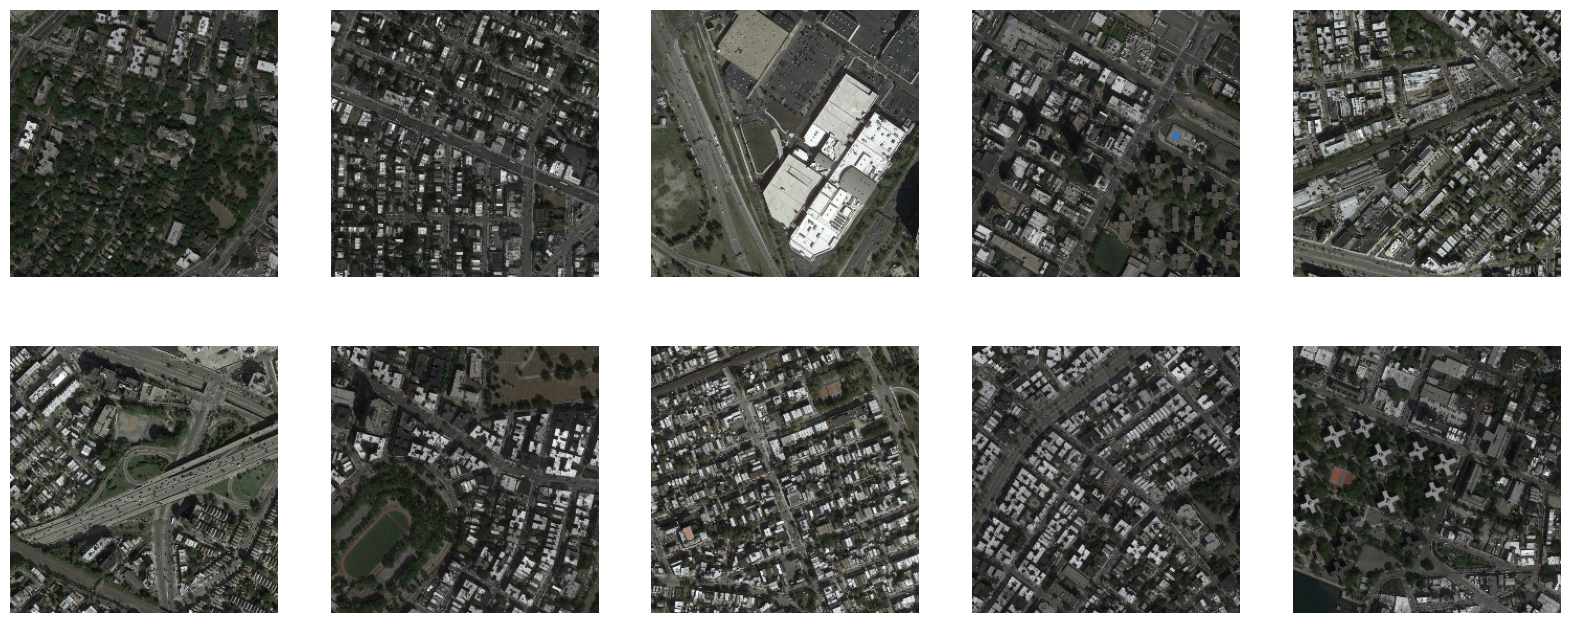

In [93]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_image(sample_images[i])